# speed up graphs for parralelisation

In [20]:
# speed tests
mpi_cores = [2,10,20,40,60,80,100,200,280,300]
mpi_times = [5.225689952159641, 0.5698658002175366, 0.2761596009580796, 0.14349941399406357, 0.09708592028316865, 0.08158155453957593, 0.06397446999914226, 0.04267250263809762, 0.03894918543159764, 0.039870780171746036]

local_cores = [1,2,10,20,40,60,80]
local_times = [4.905603394649996, 6.289567973878649, 6.438861921855381, 6.791049808263779, 7.110521283260612, 7.244502800266917, 7.444024534786449]

In [21]:
import matplotlib.pyplot as plt
#import matplotlib

#matplotlib.rcParams['font.family'] = 'cantarell'
serif_font = {'fontname':'cantarell'}

# strong scaling

### Amdahl's law
speedup = T/(s+p/N)

where:

s = serial parts execution time on one processor core 

p = parralel parts execution time on one processor core

T = s + p overall runtime on one processor core

N = number of processor cores used for parallelization


In [22]:
s = 0.00635
p = 4.89924
amdahl_speedup_per_cores = []
for N in mpi_cores:
    amdahl_speedup_per_cores.append((s+p)/(s+p/N))
    
# max speedup
T = p+s
print('max speedup with T=',T)
print(T/s)

max speedup with T= 4.90559
772.5338582677166


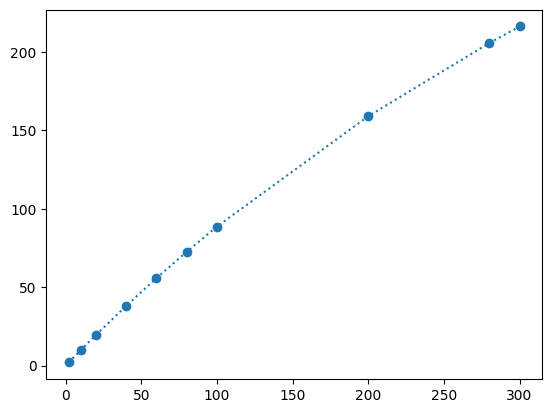

In [23]:
plt.plot(mpi_cores, amdahl_speedup_per_cores, linestyle=':', marker='o')

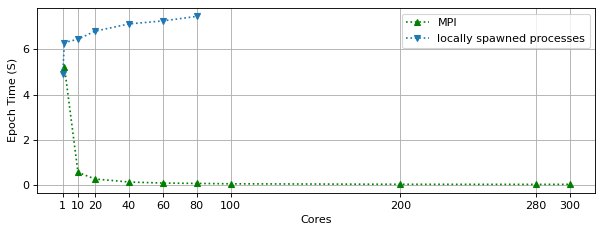

In [24]:
# figure properties
plt.figure(figsize=(9, 3), dpi=80, facecolor='w', edgecolor='k')

# data plotting
plt.plot(mpi_cores, mpi_times, linestyle=':', marker='^', label='MPI', color='green')
plt.plot(local_cores, local_times, linestyle=':', marker='v', label='locally spawned processes')

plt.xticks([1,10,20,40,60,80,100, 200, 280, 300])

plt.xlabel('Cores')
plt.ylabel('Epoch Time (S)')

# showing figure
plt.legend()
plt.grid()
plt.savefig('Epoch_runtime.png', dpi=300, bbox_inches='tight')
plt.show()



### inlet plotting

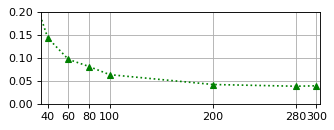

In [25]:
# figure properties
plt.figure(figsize=(4.5, 1.5), dpi=80, facecolor='w', edgecolor='k')

# data plotting
plt.plot(mpi_cores, mpi_times, linestyle=':', marker='^', color='green')
#plt.plot(local_cores, local_times, linestyle=(0, (1, 10)), marker='v')

plt.xticks([2,10,20,40,60,80,100, 200, 280, 300])

#plt.xlabel('Cores')
#plt.ylabel('Time (S)')
plt.xlim((33,303))
plt.ylim((0, 0.2))
# showing figure
plt.grid()
plt.savefig('Epoch_runtime_inlet.png', dpi=300, bbox_inches='tight')
plt.show()



#plt.savefig('filename.png', dpi=300)

### speedup calculation

In [7]:
import numpy as np

In [8]:
# calculate speedup with 1 process as reference point
mpi_speedup = mpi_times[0]/np.array(mpi_times)
local_speedup = local_times[0]/np.array(local_times)
mpi_to_local_speedup = local_times[0]/np.array(mpi_times)

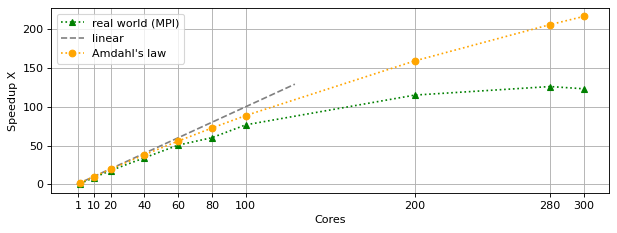

In [27]:
# figure properties
plt.figure(figsize=(9, 3), dpi=80, facecolor='w', edgecolor='k')

# data plotting
# speedup compared to 2 mpi processes
#plt.plot(mpi_cores, mpi_speedup, linestyle=':', marker='^')
# speedup compared to one local core
plt.plot(mpi_cores, mpi_to_local_speedup, linestyle=':', marker='^', label='real world (MPI)', color='green')
# linear speedup
plt.plot(range(130), linestyle='--', label='linear', color='grey')
# Amdahl's law
plt.plot(mpi_cores, amdahl_speedup_per_cores, linestyle=':', marker='o', label="Amdahl's law", color='orange')


plt.xticks([1,10,20,40,60,80,100, 200, 280, 300])

plt.xlabel('Cores')
plt.ylabel('Speedup X')

# showing figure
plt.legend()
plt.grid()
plt.savefig('Epoch_Amdahls_speedup.png', dpi=300, bbox_inches='tight')
plt.show()



### table

In [37]:
# table strong scaling
for c, et, t, r in zip(mpi_cores, mpi_times, amdahl_speedup_per_cores, mpi_to_local_speedup):
    print(f'128 & ${c}$ & ${et:.3f}$ & ${t:.2f}$ & ${r:.2f}$ \\')


128 & $2$ & $5.226$ & $2.00$ & $0.94$ \
128 & $10$ & $0.570$ & $9.88$ & $8.61$ \
128 & $20$ & $0.276$ & $19.52$ & $17.76$ \
128 & $40$ & $0.143$ & $38.08$ & $34.19$ \
128 & $60$ & $0.097$ & $55.74$ & $50.53$ \
128 & $80$ & $0.082$ & $72.58$ & $60.13$ \
128 & $100$ & $0.064$ & $88.64$ & $76.68$ \
128 & $200$ & $0.043$ & $159.03$ & $114.96$ \
128 & $280$ & $0.039$ & $205.71$ & $125.95$ \
128 & $300$ & $0.040$ & $216.29$ & $123.04$ \


# Weak scaling

scaled speedup = s + p × N

s = serial part execution fraction

p = parallel part executio fraction

1 = s + p

N = number of processors used

In [10]:
s = 0.00635
p = 4.89924
T = s + p
# frac
s_f = s/T
p_f = p/T

gustavson_speedup_per_cores = []

for N in mpi_cores:
    gustavson_speedup_per_cores.append(s_f+p_f*N)

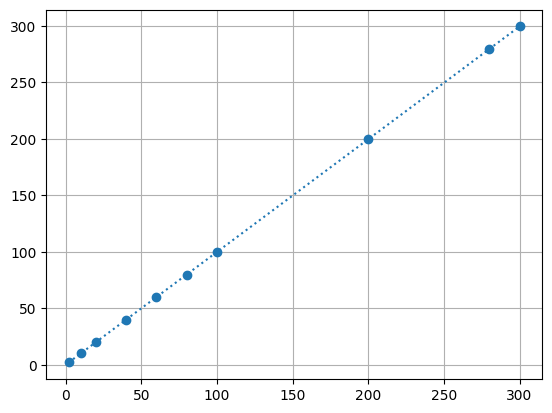

In [11]:
plt.plot(mpi_cores, gustavson_speedup_per_cores, linestyle=':', marker='o')
#plt.xticks(mpi_cores)
plt.grid()
plt.show()

### real world data

In [40]:
mpi_cores_gustav = [2,10,20,40,60,80,100,200,280,300]
mpi_times_gustav = [
    5.225689952159641,
    2.508382789550289,
    2.614600996817312,
    2.949139879595849,
    3.3782926528684554,
    4.276260360594718,
    4.687892344690138,
    11.918889322588521,
    21.86820093277962,
    26.4730200382971
]
# 3.940 ÷ (4.378÷24)

mpi_times_gustav_speedup = local_times[0]/(np.array(mpi_times_gustav)/np.array(mpi_cores_gustav))



In [44]:
local_times[0]

4.905603394649996

In [43]:
mpi_times_gustav_speedup

array([  1.87749501,  19.55683724,  37.52468083,  66.53605587,
        87.12572708,  91.77370845, 104.64411369,  82.31645184,
        62.8112461 ,  55.59173137])

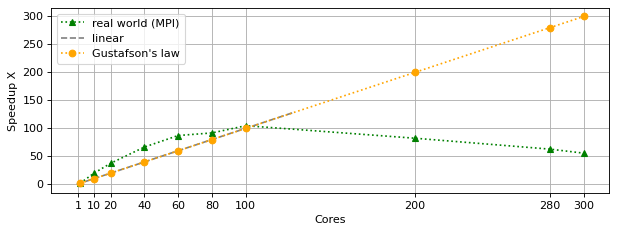

In [41]:
# figure properties
plt.figure(figsize=(9, 3), dpi=80, facecolor='w', edgecolor='k')

# data plotting
# speedup compared to one local core
plt.plot(mpi_cores_gustav, mpi_times_gustav_speedup, linestyle=':', marker='^', label='real world (MPI)', color='green')
# linear speedup
plt.plot(range(130), linestyle='--', label='linear', color='grey')
# Gustav's law
plt.plot(mpi_cores_gustav, gustavson_speedup_per_cores, linestyle=':', marker='o', label="Gustafson's law", color='orange')


plt.xticks([1,10,20,40,60,80,100, 200, 280, 300])

plt.xlabel('Cores')
plt.ylabel('Speedup X')

# showing figure
plt.legend()
plt.grid()
plt.savefig('Epoch_Gustavsons_speedup.png', dpi=300, bbox_inches='tight')
plt.show()

#plt.savefig('filename.png', dpi=300)

### table

In [42]:
# table strong scaling
for c, et, t, r in zip(mpi_cores_gustav, mpi_times_gustav, gustavson_speedup_per_cores, mpi_times_gustav_speedup):
    print(f'{64*c} & ${c}$ & ${et:.3f}$ & ${t:.2f}$ & ${r:.2f}$ \\')

128 & $2$ & $5.226$ & $2.00$ & $1.88$ \
640 & $10$ & $2.508$ & $9.99$ & $19.56$ \
1280 & $20$ & $2.615$ & $19.98$ & $37.52$ \
2560 & $40$ & $2.949$ & $39.95$ & $66.54$ \
3840 & $60$ & $3.378$ & $59.92$ & $87.13$ \
5120 & $80$ & $4.276$ & $79.90$ & $91.77$ \
6400 & $100$ & $4.688$ & $99.87$ & $104.64$ \
12800 & $200$ & $11.919$ & $199.74$ & $82.32$ \
17920 & $280$ & $21.868$ & $279.64$ & $62.81$ \
19200 & $300$ & $26.473$ & $299.61$ & $55.59$ \


# Into todo
- take not only always the n best performing individuals but with a propability of P take one or two of the fittest n elit individuals
- in the MPI implemetation implement a check that ensures that the main process does not wait indevinitely if a result is not retrieved from the worker. This could be done by adding a time stamp to each gene in process and if it is not finished after a time defined in the global configuration file then the gene is send to another worker for processing. Additionally it should be checked if the worker is okay and fully functioning. And maybe there is also a message printed because it could be that this particular gene results in a infinite loop during fitness evaluation and as such can not be evaluated, the experiment has a bug...

In [18]:
if (True and
    True):
    print('l')

l
